# Imports

In [57]:
import pandas as pd
import tifffile as tif
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import sqlite3
import math

# Function Definitions

In [23]:
def stitch_images_iteratively(images):
    stitched_images=[]
    for i in np.arange(0,len(images)-1,2):
        stitcher = cv2.Stitcher_create()
        (status, stitched) = stitcher.stitch(images[i],images[i+1])
        if status:
            stitched_images.append(stitched)
            print(i)
        else:
            print("{} failed",i)
    if len(images)%2:
        stitched_images.append(images[-1])
    return stitched_images

   # 20220509

In [2]:
fld = '/Users/dennise/Desktop/20210524-20220509T145629Z-001/20210524/'
os.listdir(fld)

['log-44-4026C-20210524T105851-0400.bin',
 'log.bin',
 'media.db',
 'media.db-journal',
 'P1110201.JPG',
 'P1110202.JPG',
 'P1110203.JPG',
 'P1110204.JPG',
 'P1110205.JPG',
 'P1110206.JPG',
 'P1110207.JPG',
 'P1110208.JPG',
 'P1110209.JPG',
 'P1110210.JPG',
 'P1110211.JPG',
 'P1110212.JPG',
 'P1110213.JPG',
 'P1110214.JPG',
 'P1110215.JPG',
 'P1110216.JPG',
 'P1110217.JPG',
 'P1110218.JPG',
 'P1110219.JPG',
 'P1110220.JPG',
 'P1110221.JPG',
 'P1110222.JPG',
 'P1110223.JPG',
 'P1110224.JPG',
 'P1110225.JPG',
 'P1110226.JPG',
 'P1110227.JPG',
 'P1110228.JPG',
 'P1110229.JPG',
 'P1110230.JPG',
 'P1110231.JPG',
 'P1110232.JPG',
 'P1110233.JPG',
 'P1110234.JPG',
 'P1110235.JPG',
 'P1110236.JPG',
 'P1110237.JPG',
 'P1110238.JPG',
 'P1110239.JPG',
 'P1110240.JPG',
 'P1110241.JPG',
 'P1110242.JPG',
 'P1110243.JPG',
 'P1110244.JPG',
 'P1110245.JPG',
 'P1110246.JPG',
 'P1110247.JPG',
 'P1110248.JPG',
 'P1110249.JPG',
 'P1110250.JPG',
 'P1110251.JPG',
 'P1110252.JPG',
 'P1110253.JPG',
 'P1110254.

In [39]:
db_file = os.path.join(fld,'media.db')
con = sqlite3.connect(db_file)
cur = con.cursor()
x=[row for row in cur.execute("SELECT * FROM resources ")]

In [41]:
'P'+x[0][1][5:]

'P1110201.JPG'

In [6]:
x[0][9:12]

(40.353302, -74.719749, 50.391037)

In [42]:
names = []
lats=[]
lons=[]
heights=[]

for i in np.arange(0,len(x)):
    names.append('P'+x[i][1][5:])
    lats.append(x[i][9])
    lons.append(x[i][10])
    heights.append(x[i][11])

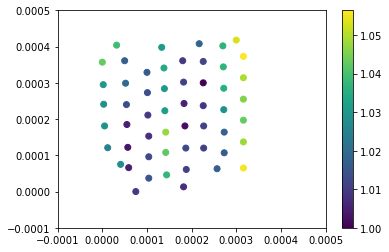

In [43]:
plt.scatter(lats-np.min(lats),lons-np.min(lons),c=heights/np.min(heights))
plt.xlim((-0.0001,0.0005))
plt.ylim((-0.0001,0.0005))
plt.colorbar()

In [45]:
df_data=pd.DataFrame({'names':names,'lats':lats,'lons':lons,'heights':heights})

In [46]:
x=df_data.names[0]
photo=cv2.imread(os.path.join(fld,x))

Text(0.5, 1.0, "['-74.71974940.353302']")

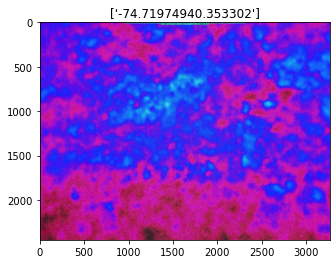

In [51]:
plt.imshow(photo)

In [68]:
photo_vals = (lats[0],lons[0])
min_max_dist=0
min_max_dist_val=100000000
    
for idx in df_data.index:
    testval = (df_data.lats[idx],df_data.lons[idx])
    if math.dist(photo_vals,testval) >0 and math.dist(photo_vals,testval)< min_max_dist_val:
        min_max_dist=idx
        min_max_dist_val=math.dist(photo_vals,testval)
        print(idx)
        print(min_max_dist_val)

1
7.199999998874773e-05
12
6.010823570258977e-05
13
5.903388857314529e-05


In [116]:
new_photo_vals=(lats[1],lons[1])
print(new_photo_vals)
print(photo_vals)

(40.353302, -74.719677)
(40.353302, -74.719749)


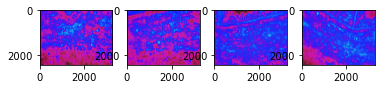

In [119]:
plt.subplot(1,4,1)
plt.imshow(photo)
plt.subplot(1,4,2)
plt.imshow(cv2.imread(os.path.join(fld,df_data.names[1])))
plt.subplot(1,4,3)
plt.imshow(cv2.imread(os.path.join(fld,df_data.names[2])))
plt.subplot(1,4,4)
plt.imshow(cv2.imread(os.path.join(fld,df_data.names[3])))


In [169]:
p0=cv2.imread(os.path.join(fld,df_data.names[3]))
p1=cv2.imread(os.path.join(fld,df_data.names[2]))

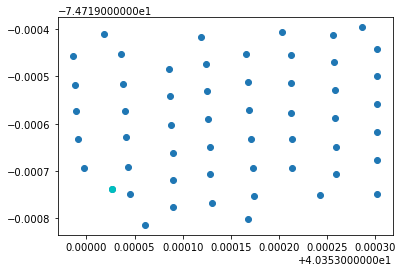

In [115]:
i=53
plt.scatter(df_data.lats,df_data.lons)
plt.scatter(df_data.lats[i],df_data.lons[i],c='c')

In [121]:
names=['wedge3','wedge4','wedge5','wedge6','wedge7','wedge8','wedge1','wedge2','tower']

In [122]:
coords=[(40.353241,-74.719421),(40.353305,-74.719577),(40.353270,-74.719740),(40.353152,-74.719831),(40.353023,-74.719780),(40.352954,-74.719629),(40.352987,-74.719459),(40.353108,-74.719376),(40.353130,-74.719599)]

In [192]:
p0_gray=cv2.cvtColor(p0,cv2.COLOR_RGB2GRAY)
p1_gray = cv2.cvtColor(p1,cv2.COLOR_RGB2GRAY)

In [214]:
image=p0_gray
descriptor = cv2.xfeatures2d.SIFT_create()
(kps, features) = descriptor.detectAndCompute(image, None)

In [215]:
p0_kps=np.float32([kp.pt for kp in kps])
p0_features = features

(kps, features) = descriptor.detectAndCompute(p1_gray, None)
p1_kps=np.float32([kp.pt for kp in kps])
p1_features = features


In [246]:
mode = cv2.Stitcher_PANORAMA
#mode = cv2.Stitcher_SCANS

stitcher = cv2.Stitcher.create(mode)
status, scn = stitcher.stitch([p1_gray,p0_gray])
print(status)

1


In [254]:
img1=p1_gray
img2=p0_gray

In [255]:
sift = cv2.xfeatures2d.SIFT_create()
# find the key points and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

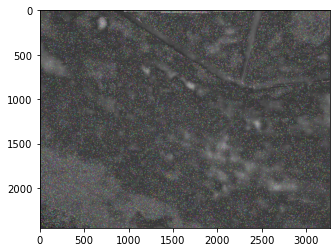

In [268]:
plt.imshow(cv2.drawKeypoints(img2,kp2,None))

In [ ]:
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
match = cv2.FlannBasedMatcher(index_params, search_params)
matches = match.knnMatch(des1,des2,k=2)

In [ ]:
good = []
for m,n in matches:
    if m.distance < 0.03*n.distance:
        good.append(m)
good

In [ ]:

draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   flags = 2)

img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)
cv2.imshow("original_image_drawMatches.jpg", img3)

In [193]:
stitcher = cv2.Stitcher_create()
(status,stitched)=stitcher.stitch([p0_gray,p1_gray])
status

1

()

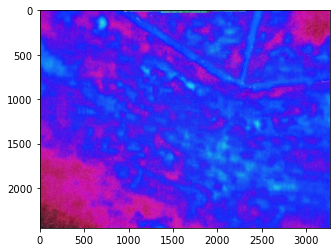

In [179]:
plt.imshow(p0)

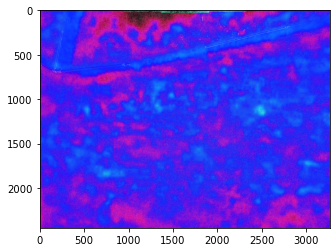

In [182]:
plt.imshow(p1)

NoneType

# old

building off of https://www.pyimagesearch.com/2018/12/17/image-stitching-with-opencv-and-python/ 

In [24]:
fld = '/Users/dennise/Desktop/20210612'
thermal_images=[]
images=[]
images_names=[]
thermal_images_names=[]
for file in sorted(os.listdir(fld)):
    if 'full photo.JPG' in file:
        print(file)
        im = cv2.imread(os.path.join(fld,file))
        images.append(im)
        images_names.append(file)
        #if 'photo' in file:
        #    images.append(im)
        #    images_names.append(file)
        #else:
        #    thermal_images.append(im)
        #    thermal_images_names.append(file)

06122021_511- full photo.JPG
06122021_512- full photo.JPG
06122021_514- full photo.JPG
06122021_515- full photo.JPG
06122021_516- full photo.JPG
06122021_517- full photo.JPG
06122021_518- full photo.JPG
06122021_519- full photo.JPG
06122021_520- full photo.JPG
06122021_521- full photo.JPG
06122021_522- full photo.JPG
06122021_523- full photo.JPG
06122021_524- full photo.JPG
06122021_525- full photo.JPG
06122021_526- full photo.JPG
06122021_527- full photo.JPG
06122021_528- full photo.JPG
06122021_529- full photo.JPG
06122021_530- full photo.JPG
06122021_531- full photo.JPG
06122021_532- full photo.JPG
06122021_533- full photo.JPG
06122021_534- full photo.JPG
06122021_535- full photo.JPG
06122021_536- full photo.JPG
06122021_537- full photo.JPG
06122021_538- full photo.JPG
06122021_539- full photo.JPG
06122021_540- full photo.JPG
06122021_541- full photo.JPG
06122021_542- full photo.JPG
06122021_543- full photo.JPG
06122021_544- full photo.JPG
06122021_545- full photo.JPG
06122021_546- 

In [25]:
#563, 562
print(images_names[-4])
print(images_names[-5])

06122021_563- full photo.JPG
06122021_562- full photo.JPG


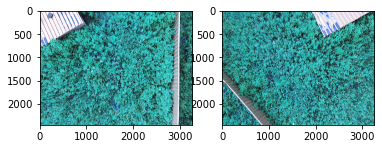

In [26]:
val=-5
stitcher = cv2.Stitcher_create()
(status, stitched) = stitcher.stitch(images[val:val+2],)
image0 = np.squeeze(images[val])
image1 = np.squeeze(images[val+1])

plt.subplot(1,2,1)
plt.imshow(image0)
plt.subplot(1,2,2)
plt.imshow(image1)

In [35]:
stitcher = cv2.Stitcher_create()
(status, stitched) = stitcher.stitch([image1,image0])
np.shape(stitched)

()

In [33]:
plt.scatter(kps2[:,0],kps2[:,1],0.1)

NameError: name 'kps2' is not defined

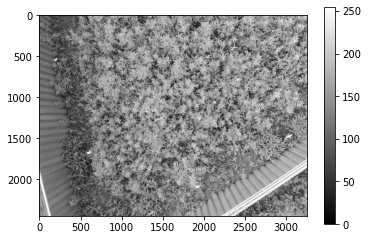

In [10]:
plt.imshow(gray,cmap='gray')
plt.colorbar()

In [11]:
final_stitched_image=images
progress_stitch = []
while len(final_stitched_image)!=1:
    print("length is {}... now stitching".format(len(final_stitched_image)))
    final_stitched_image = stitch_images_iteratively(final_stitched_image)
    progress_stitch.append(final_stitched_image)

length is 54... now stitching
0
2
4
6
8
10


KeyboardInterrupt: 

In [ ]:
final_stitched_image=images
final_stitched_image = stitch_images_iteratively(final_stitched_image)
progress_stitch.append(final_stitched_image)

In [30]:
stitched_images=[]
for i in np.arange(0,4,2):
    stitcher = cv2.Stitcher_create()
    (status, stitched) = stitcher.stitch(images[i],images[i-1])
    stitched_images.append(stitched)

0
2


In [54]:
i=8
(status, stitched)=stitcher.stitch(images[i],images[i-1])

1

In [136]:
?stitcher.stitch

Docstring:
stitch(images[, pano]) -> retval, pano
.   @overload



stitch(images, masks[, pano]) -> retval, pano
.   @brief These functions try to stitch the given images.
.   
.       @param images Input images.
.       @param masks Masks for each input image specifying where to look for keypoints (optional).
.       @param pano Final pano.
.       @return Status code.
Type:      builtin_function_or_method


In [36]:
i=-5
stitcher = cv2.Stitcher_create()
(status, stitched) = stitcher.stitch(images[i],images[i+1])
print(status)
np.shape(stitched)

1


(2448, 3264, 3)

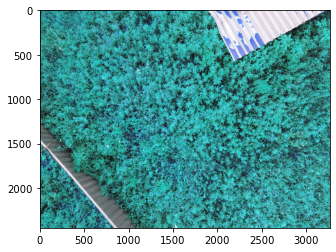

In [37]:
plt.imshow(stitched)

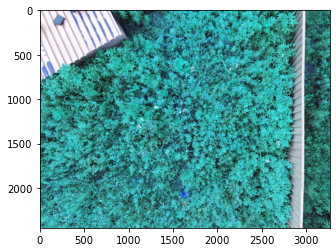

In [38]:
plt.imshow(images[i])

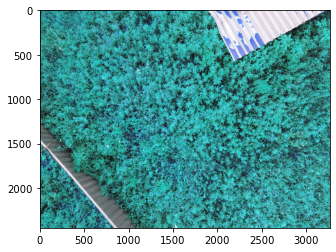

In [39]:
plt.imshow(images[i+1])

In [59]:

MIN_MATCH_COUNT = 10
img1 = image1
img2 = image2

In [72]:
# Initiate SIFT detector
sift = cv2.SIFT_create()
# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(image0,None)
kp2, des2 = sift.detectAndCompute(image1,None)
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1,des2,k=2)
# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)
        
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    h,w,d = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)
    img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)
else:
    print( "Not enough matches are found - {}/{}".format(len(good), MIN_MATCH_COUNT) )
    matchesMask = None

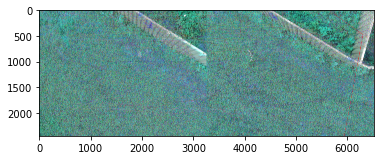

In [62]:
img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,img2)
plt.imshow(img3)
plt.show()

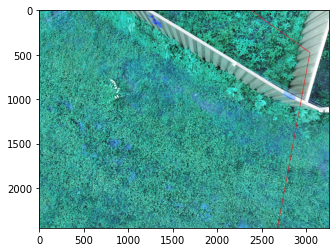

In [67]:
plt.imshow(img2)
plt.show()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0]